### Clasificador Euclídeo

In [5]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets 

#Carga un dataset de ejemplo
dataset = datasets.load_iris()

#Imprime el dataset para verlo
print(dataset.feature_names) 
print("dataDim=",dataset.data.shape)
print("data=",dataset.data)

print(dataset.target_names)
print("targetDim=",dataset.target.shape)
print("target=",dataset.target)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
dataDim= (150, 4)
data= [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]


In [6]:
X = dataset.data[:,2:4]
Y = dataset.target

In [7]:
import numpy as np

c1 = X[Y==0]
c2 = X[Y==1]
c3 = X[Y==2]

z1 = np.mean(c1,axis=0)
z2 = np.mean(c2,axis=0)
z3 = np.mean(c3,axis=0)

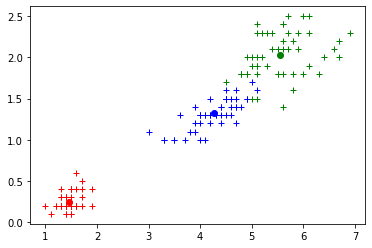

In [8]:
import matplotlib.pyplot as plt

plt.plot(c1[:,0],c1[:,1],'+',color='red')
plt.plot(c2[:,0],c2[:,1],'+',color='blue')
plt.plot(c3[:,0],c3[:,1],'+',color='green')
plt.plot(z1[0],z1[1],'o',color='red')
plt.plot(z2[0],z2[1],'o',color='blue')
plt.plot(z3[0],z3[1],'o',color='green')

plt.show()

In [9]:
patron_desconocido=np.array([3,0.5])
d1 = np.sqrt(np.sum((z1-patron_desconocido)**2))
d2 = np.sqrt(np.sum((z2-patron_desconocido)**2))
d3 = np.sqrt(np.sum((z3-patron_desconocido)**2))

minimo = np.min([d1,d2,d3])

if d1 == minimo:
    print("Es setosa")
elif d2 == minimo:
    print("Es versicolor")
else:
    print("Es virginica")

Es versicolor


### Clasificador knn

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, random_state=0)
n_neighbors=3

knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.96
Accuracy of K-NN classifier on test set: 0.97


### Clasificador Paramétrico Bayesiano (basado en gaussianas)

In [11]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

X,y = make_classification(n_samples=3000, 
                          n_features=2, n_informative=2, n_redundant=0, n_repeated=0, 
                          n_classes=4, 
                          n_clusters_per_class=1,
                          class_sep=1.5, flip_y=0,
                          weights=[1./3,1./3.,1/.3])



(3000, 2)


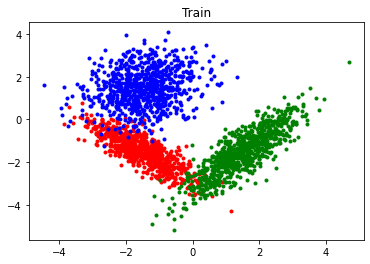

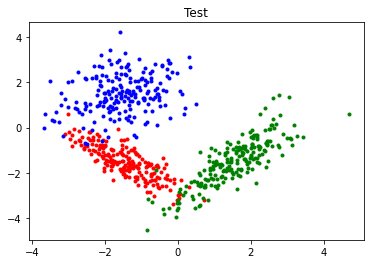

In [3]:
print(X.shape)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y)
ys = np.unique(y)
colors_plt = ['r.', 'g.', '.b']
plt.figure()
plt.title("Train")
for i in range(len(ys)):
    Xc = X_train[y_train==ys[i]]
    plt.plot(Xc[:,0], Xc[:,1], colors_plt[i])
plt.show()
plt.figure()
plt.title("Test")
for i in range(len(ys)):
    Xc = X_test[y_test==ys[i]]
    plt.plot(Xc[:,0], Xc[:,1], colors_plt[i])
plt.show()


In [12]:
import cv2
import numpy as np

clf = cv2.ml.NormalBayesClassifier_create()
clf.train(np.float32(X), cv2.ml.ROW_SAMPLE, np.int32(y))
_,predicted = clf.predict(np.float32(X_train))
acierto_train = np.sum(1*(y_train == predicted[:,0]))/y_train.shape[0]
print(acierto_train)
print("El acierto en train es del ", acierto_train*100, "%")

_,predicted = clf.predict(np.float32(X_test))
acierto_test = np.sum(1*(y_test == predicted[:,0]))/y_test.shape[0]
print(acierto_test)
print("El acierto en test es del ", acierto_test*100, "%")

0.30357142857142855
El acierto en train es del  30.357142857142854 %
0.42105263157894735
El acierto en test es del  42.10526315789473 %


### Naïve Bayes

In [1]:
import numpy as np

train_data = np.genfromtxt('TrainBayes.csv', delimiter=',')

X = train_data[:,0:2]
Y = train_data[:,2]

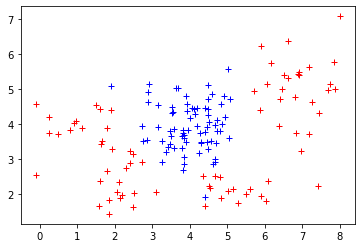

In [2]:
from matplotlib import pyplot as plt

c1 = X[Y==0]
c2 = X[Y==1]

plt.plot(c1[:,0],c1[:,1],'+',color='red')
plt.plot(c2[:,0],c2[:,1],'+',color='blue')

plt.show()

In [3]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X,Y)

GaussianNB()

In [4]:
predicted = gnb.predict(X)
acierto_train = np.sum(1*(Y == predicted))/Y.shape[0]

print("El acierto en train es del ", acierto_train*100, "%")

El acierto en train es del  97.33333333333334 %


In [5]:
test_data = np.genfromtxt('TestBayes.csv', delimiter=',')
X_test = test_data[:,0:2]
Y_test = test_data[:,2]

test_predicted = gnb.predict(X_test)
acierto_test = np.sum(1*(Y_test == test_predicted))/Y_test.shape[0]
print("El acierto en test es del ", acierto_test*100, "%")

El acierto en test es del  96.0 %


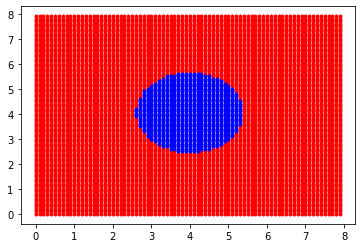

In [6]:
XP = []
for x in range(0,80):
    for y in range(0,80):
       XP.append([x/10,y/10])
XP = np.array(XP)

YP = gnb.predict(XP).astype(int)

c1 = XP[YP==0]
c2 = XP[YP==1]

plt.plot(c1[:,0],c1[:,1],'.',color='red')
plt.plot(c2[:,0],c2[:,1],'.',color='blue')

plt.show()

### GMM

In [7]:
import matplotlib.pyplot as plt
from sklearn import cluster, datasets, mixture
import numpy as np
from scipy.stats import multivariate_normal
from sklearn.datasets import make_spd_matrix
plt.rcParams["axes.grid"] = False

# define the number of samples to be drawn
n_samples = 100

In [8]:
# define the mean points for each of the systhetic cluster centers
t_means = [[8.4, 8.2], [1.4, 1.6], [2.4, 5.4], [8.4, 2.4]]
# for each cluster center, create a Positive semidefinite convariance matrix
t_covs = []
for s in range(len(t_means)):
  t_covs.append(make_spd_matrix(2))
X = []
for mean, cov in zip(t_means,t_covs):
  x = np.random.multivariate_normal(mean, cov, n_samples)
  X += list(x)  
Y=np.repeat(np.arange(1,3),n_samples*2)
X = np.array(X)
y_index=np.arange(0,len(X))
np.random.shuffle(y_index)
X=X[y_index]
Y=Y[y_index]
print("Dataset shape:", X.shape)

Dataset shape: (400, 2)


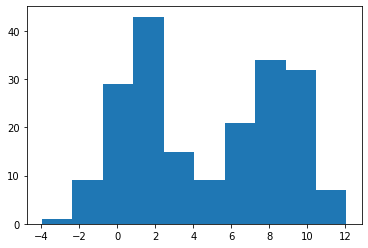

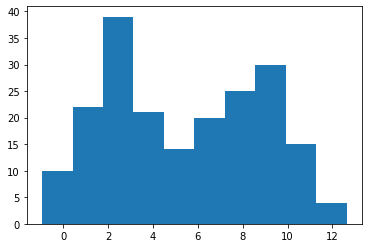

In [9]:
from matplotlib import pyplot as plt
plt.hist(X[Y==1,0])
plt.show()
from matplotlib import pyplot as plt
plt.hist(X[Y==2,0])
plt.show()

In [10]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

from sklearn import datasets
from sklearn.model_selection import train_test_split

from sklearn.mixture import GaussianMixture



n_classes = len(np.unique(Y))

X_train, X_test, y_train, y_test = train_test_split(X,Y, random_state=0)

In [11]:
model = GaussianMixture(n_components=n_classes, init_params='random', covariance_type='full')
model.fit(X_train)
# predict latent values
yhat = model.predict(X_train)
acierto_train = np.sum(1*(y_train == yhat))/y_train.shape[0]


print("El acierto en train es del ", acierto_train*100, "%")


# predict latent values
yhat = model.predict(X_test)
acierto_test = np.sum(1*(y_test == yhat))/y_test.shape[0]


print("El acierto en test es del ", acierto_test*100, "%")

El acierto en train es del  49.333333333333336 %
El acierto en test es del  51.0 %


### k-medias

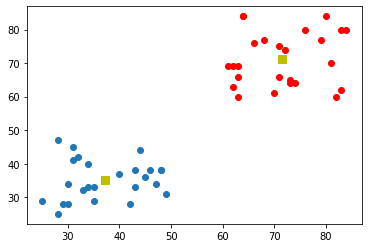

In [13]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Creamos al azar los patrones a clasificar
X = np.random.randint(25,50,(25,2))
Y = np.random.randint(60,85,(25,2))
Z = np.vstack((X,Y))
Z = np.float32(Z)

# Aplicamos kmedias
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
ret,label,center=cv2.kmeans(Z,2,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

# Mostramos los resultados
A = Z[label.ravel()==0]
B = Z[label.ravel()==1]
plt.scatter(A[:,0],A[:,1])
plt.scatter(B[:,0],B[:,1],c = 'r')
plt.scatter(center[:,0],center[:,1],s = 80,c = 'y', marker = 's')
plt.show()

In [ ]:
# Completar el algoritmo de k-medias

### Reducción de dimensionalidad con PCA

In [14]:
from sklearn import datasets
from sklearn.decomposition import PCA

iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

### Reducción de dimensionalidad con LDA

#### LDA biclase

In [15]:
import numpy as np
from matplotlib import pyplot as plt

c1_a = np.random.normal(20,10,100)
c2_a = c1_a + np.random.normal(0,1,100)
c1_b = np.random.normal(30,10,100)
c2_b = c1_b + 20 + np.random.normal(0,10,100)
c_a = np.array([c1_a,c2_a])
c_b = np.array([c1_b,c2_b])

mean_a = np.mean(c_a,axis=1)
mean_b = np.mean(c_b,axis=1)
between = (mean_a-mean_b)*(mean_a-mean_b)

covariances = np.array([np.cov(c_a),np.cov(c_b)])
within = covariances[0]+covariances[1]

F = np.dot(between,np.linalg.inv(within))

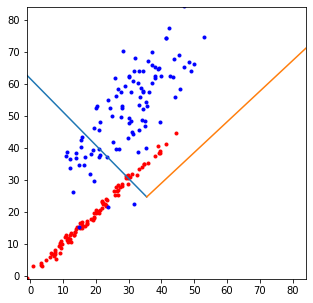

In [16]:
# Configuramos la figura
plt.figure(figsize=(5,5))
minLimit = np.min(np.concatenate([c_a,c_b],axis=1)).astype(np.int)
maxLimit = np.max(np.concatenate([c_a,c_b],axis=1)).astype(np.int)
plt.ylim(minLimit,maxLimit)
plt.xlim(minLimit,maxLimit)

# Pintamos la nube de puntos
plt.plot(c_a[0,:],c_a[1,:],'.',color='red')
plt.plot(c_b[0,:],c_b[1,:],'.',color='blue')
px=((mean_a + mean_b) / 2)[1]
py=((mean_a + mean_b) / 2)[0]
factor = 10

# La linea naranja marca la dirección de separación óptima
plt.plot([px, px+F[0]*factor], [py+0, py+F[1]*factor])
plt.plot([px, px+F[1]*factor], [py, py-F[0]*factor])
plt.show()

#### LDA multiclase

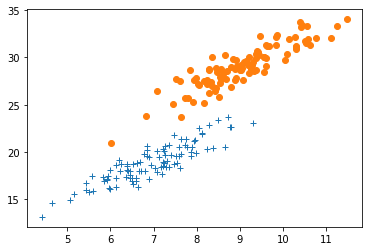

In [18]:
import numpy as np
from matplotlib import pyplot as plt

c1_a = np.random.normal(7,1,100)
c2_a = c1_a * 2 + np.random.normal(5,1,100)

c1_b = np.random.normal(9,1,100)
c2_b = c1_b * 2 + np.random.normal(11,1,100)

plt.plot(c1_a,c2_a,'+')
plt.plot(c1_b,c2_b,'o')

plt.show()

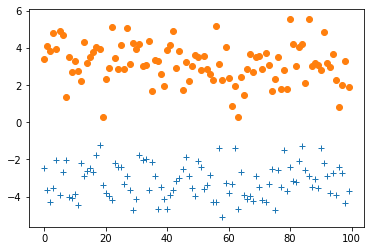

In [19]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
c_a = np.array([c1_a,c2_a])
c_b = np.array([c1_b,c2_b])
y_a = np.zeros(100)
y_b = np.ones(100)
X = np.concatenate((c_a,c_b),axis=1)
X = X.transpose()
y = np.concatenate((y_a,y_b))

lda = LinearDiscriminantAnalysis()
lda.fit(X,y)


XT = lda.transform(X)
plt.plot(XT[0:100],'+')
plt.plot(XT[100:200],'o')
plt.show()